# Binding LTD to HLA-A*01

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
path_figs = '../../figures/dextramer/revision_plan/'
path_results = '../../results/dextramer/CD8/revision2'

## NetMHCPan4.1 from online repo

In [4]:
df_netmhcpan = pd.read_csv('../../results/dextramer/CD8/revision/ltd_mutations_netMHCpan.csv')

In [5]:
df_netmhcpan

,mhc,epitope,position,score,rank,classification
0,HLA-A*01:01,LTDEMIAQY,-,0.997196,0.001,SB
1,HLA-A*01:01,ATDEMIAQY,1,0.997025,0.001,SB
2,HLA-A*01:01,LADEMIAQY,2,0.969870,0.016,SB
3,HLA-A*01:01,LTAEMIAQY,3,0.854092,0.075,SB
4,HLA-A*01:01,LTDAMIAQY,4,0.995075,0.002,SB
5,HLA-A*01:01,LTDEAIAQY,5,0.996989,0.002,SB
6,HLA-A*01:01,LTDEMAAQY,6,0.997619,0.001,SB
7,HLA-A*01:01,LTDEMIAAY,8,0.993228,0.003,SB
8,HLA-A*01:01,LTDEMIAQA,9,0.231179,0.674,WB


## mhcFlurry

In [6]:
peptides = df_netmhcpan['epitope'].values

In [7]:
from mhcflurry import Class1PresentationPredictor
predictor = Class1PresentationPredictor.load()
df_mhcflurry = predictor.predict(peptides=peptides.tolist(), alleles=["HLA-A0101"], verbose=0)

1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 201ms/step


C:\Users\felix.drost\Anaconda3\envs\mhcflurry\lib\site-packages\mhcflurry\amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


1/1 [==============================] - 0s 384ms/step


In [8]:
df_mhcflurry

,peptide,peptide_num,sample_name,affinity,best_allele,processing_score,presentation_score,presentation_percentile
0,LTDEMIAQY,0,sample1,25.381196,HLA-A0101,0.844675,0.984800,0.003723
1,ATDEMIAQY,1,sample1,26.589142,HLA-A0101,0.897982,0.986804,0.002500
2,LADEMIAQY,2,sample1,33.001598,HLA-A0101,0.803164,0.977450,0.010870
3,LTAEMIAQY,3,sample1,58.024237,HLA-A0101,0.445399,0.876019,0.159620
4,LTDAMIAQY,4,sample1,26.619455,HLA-A0101,0.736051,0.976809,0.012092
5,LTDEAIAQY,5,sample1,25.712878,HLA-A0101,0.909337,0.987718,0.002065
6,LTDEMAAQY,6,sample1,25.874164,HLA-A0101,0.667214,0.971378,0.017663
7,LTDEMIAAY,7,sample1,26.636221,HLA-A0101,0.666136,0.970475,0.018723
8,LTDEMIAQA,8,sample1,200.951653,HLA-A0101,0.283898,0.544192,0.728560


## Contrast

In [9]:
df_data = df_netmhcpan.copy()
df_data['mhcFlurryAffinity'] = df_mhcflurry['affinity']
df_data = df_data.rename(columns={'score': 'netMhcScore', 'rank': 'netMhcRank'})
df_data['Position'] = df_data['position'].replace('-', 'WT')
df_data

,mhc,epitope,position,netMhcScore,netMhcRank,classification,mhcFlurryAffinity,Position
0,HLA-A*01:01,LTDEMIAQY,-,0.997196,0.001,SB,25.381196,WT
1,HLA-A*01:01,ATDEMIAQY,1,0.997025,0.001,SB,26.589142,1
2,HLA-A*01:01,LADEMIAQY,2,0.969870,0.016,SB,33.001598,2
3,HLA-A*01:01,LTAEMIAQY,3,0.854092,0.075,SB,58.024237,3
4,HLA-A*01:01,LTDAMIAQY,4,0.995075,0.002,SB,26.619455,4
5,HLA-A*01:01,LTDEAIAQY,5,0.996989,0.002,SB,25.712878,5
6,HLA-A*01:01,LTDEMAAQY,6,0.997619,0.001,SB,25.874164,6
7,HLA-A*01:01,LTDEMIAAY,8,0.993228,0.003,SB,26.636221,8
8,HLA-A*01:01,LTDEMIAQA,9,0.231179,0.674,WB,200.951653,9


In [10]:
from scipy.stats import pearsonr

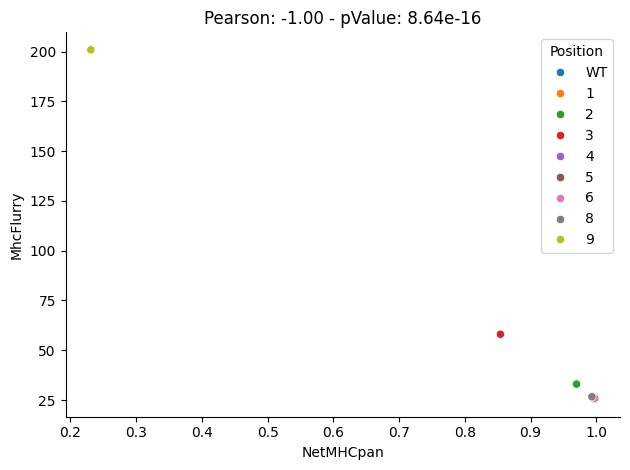

In [11]:
ax = sb.scatterplot(data=df_data, x='netMhcScore', y='mhcFlurryAffinity', hue='Position')
sb.despine(ax=ax)

corr, pval = pearsonr(df_data['netMhcScore'].values, df_data['mhcFlurryAffinity'].values)
ax.set_title(f'Pearson: {corr:.2f} - pValue: {pval:.2e}')

ax.set_xlabel('NetMHCpan')
ax.set_ylabel('MhcFlurry')

plt.tight_layout()
plt.savefig(f'{path_figs}/netMHCpan_vs_MhcFlurry.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/netMHCpan_vs_MhcFlurry.png', bbox_inches='tight', dpi=300,)
plt.show()

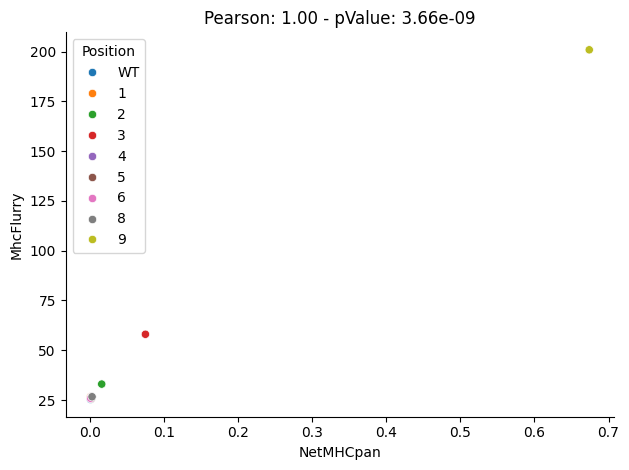

In [12]:
ax = sb.scatterplot(data=df_data, x='netMhcRank', y='mhcFlurryAffinity', hue='Position')
sb.despine(ax=ax)

corr, pval = pearsonr(df_data['netMhcRank'].values, df_data['mhcFlurryAffinity'].values)
ax.set_title(f'Pearson: {corr:.2f} - pValue: {pval:.2e}')

ax.set_xlabel('NetMHCpan')
ax.set_ylabel('MhcFlurry')

plt.tight_layout()
plt.savefig(f'{path_figs}/netMHCpan_rank_vs_MhcFlurry.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/netMHCpan_rank_vs_MhcFlurry.png', bbox_inches='tight', dpi=300,)
plt.show()

In [13]:
rename_dict = {
    'mhc': 'MHC',
    'epitope': 'Epitope',
    'Position': 'Position',
    'netMhcRank': 'NetMhc-Rank',
    'classification': 'NetMHC-Classification',
    'mhcFlurryAffinity': 'MhcFlurry-Affinity',
}
df_data_  = df_data.rename(columns=rename_dict)
df_data_ = df_data_[rename_dict.values()]
df_data_.to_csv(f'{path_results}/figS16A.csv')

## MHC motif Atlas for HLA-A*01*01

In [14]:
import logomaker as lm

In [15]:
def read_mhc_motifs():
    df_mhc = pd.read_csv('../../results/dextramer/CD8/revision/mhcMotifAtlas_hla0101.txt', header=None)
    df_mhc = df_mhc[df_mhc[0].str.len() == 9]
    df_mhc = df_mhc[0].apply(lambda x: pd.Series(list(x)))
    df_mhc.columns = [el for el in df_mhc.columns]
    df_mhc = df_mhc.apply(pd.value_counts).transpose() / len(df_mhc)
    df_mhc = df_mhc.fillna(0.0)
    return df_mhc

df_a0101 = read_mhc_motifs()

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_13384\1132298201.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_mhc = df_mhc.apply(pd.value_counts).transpose() / len(df_mhc)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_13384\1132298201.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_mhc = df_mhc.apply(pd.value_counts).transpose() / len(df_mhc)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_13384\1132298201.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_mhc = df_mhc.apply(pd.value_counts).transpose() / len(df_mhc)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_13384\1132298201.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj)

In [16]:
anchor_positions = [2, 9]

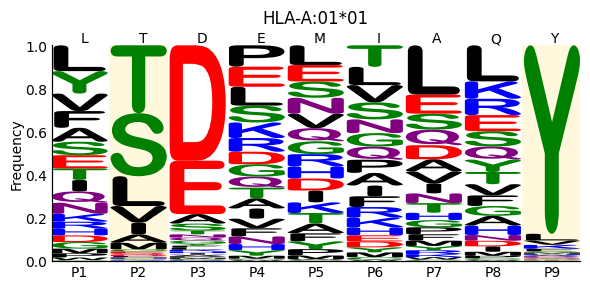

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

df = df_a0101  
logo = lm.Logo(df, stack_order='big_on_top', color_scheme='chemistry', font_name='Arial Rounded MT Bold', ax=ax, )

for p in anchor_positions:
    logo.highlight_position_range(pmin=p-1, pmax=p-1, color='cornsilk')
sb.despine(ax=ax)
ax.set_ylabel('Frequency', labelpad=1)
ax.set_xlabel('', labelpad=0)
logo.ax.set_xticks(range(df.shape[0]))
logo.ax.set_xticklabels([f'P{i+1}' for i in range(df.shape[0])])
ax.set_title('HLA-A:01*01')
ax.grid(False)
ax.tick_params(axis='both', length=0, pad=3)

epitope = 'LTDEMIAQY'
ax2 = ax.twiny()
ax2.set_xticks([(i+0.5)-i/len(epitope) for i in range(len(epitope))])  
ax2.set_xticklabels([l for l in epitope])
ax2.tick_params(axis='x', which='both', bottom=False, top=True)
sb.despine(ax=ax2)
ax2.grid(False)
ax2.tick_params(axis='x', length=0, pad=0)
ax2.set_xlim(0, len(epitope)-1)


plt.tight_layout()
plt.savefig(f'{path_figs}/hla_motifs_a0101.pdf', bbox_inches='tight', dpi=300,)
plt.savefig(f'{path_figs}/hla_motifs_a0101.png', bbox_inches='tight', dpi=300,)
plt.show()